# Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # "Support vector classifier"

# Load Data

In [2]:
data=pd.read_json('train.json')  ### Load data into a pandas dataframe
print(data)

            cuisine     id                                        ingredients
0             greek  10259  [romaine lettuce, black olives, grape tomatoes...
1       southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...
2          filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...
3            indian  22213                [water, vegetable oil, wheat, salt]
4            indian  13162  [black pepper, shallots, cornflour, cayenne pe...
5          jamaican   6602  [plain flour, sugar, butter, eggs, fresh ginge...
6           spanish  42779  [olive oil, salt, medium shrimp, pepper, garli...
7           italian   3735  [sugar, pistachio nuts, white almond bark, flo...
8           mexican  16903  [olive oil, purple onion, fresh pineapple, por...
9           italian  12734  [chopped tomatoes, fresh basil, garlic, extra-...
10          italian   5875  [pimentos, sweet pepper, dried oregano, olive ...
11          chinese  45887  [low sodium soy sauce, fresh ginger,

In [3]:
unique_ingredients=[] ### Initialize the list for all ingredients 
for i in range(len(data.id)):
    for k in data.ingredients[i]:
        if k not in unique_ingredients:
            unique_ingredients.append(k) ## Append the ingredient if it is not in the unique_ingredients

In [4]:
N = len(unique_ingredients)
M = len(data.id)
binary_assignment=[] ## Initialize the binary_assignment as a list
for i in range(M):
    assigment=np.zeros(N) ### initialze the ingredients as all 0
    for j in data.ingredients[i]:
        assigment[unique_ingredients.index(j)]=1 ### Assigne 1 if the ingreident is in the dish
    binary_assignment.append(assigment)

In [5]:
binary_assignment=np.reshape(binary_assignment,(M,N)) ## Reshape the assignemt into M by N matrix

In [6]:
labels=[]
unique_labels=np.unique(data.cuisine)
for i in data.cuisine:
    labels.append(int(np.where(unique_labels==i)[0]))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(binary_assignment, labels, test_size=0.2, random_state=0)

In [8]:
print(unique_labels)

['brazilian' 'british' 'cajun_creole' 'chinese' 'filipino' 'french'
 'greek' 'indian' 'irish' 'italian' 'jamaican' 'japanese' 'korean'
 'mexican' 'moroccan' 'russian' 'southern_us' 'spanish' 'thai'
 'vietnamese']


In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import pylab as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.figure(figsize=(10,10))
    plt.rcParams.update({'font.size': 15})

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes, rotation=90)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def correct_fraction(mat_test, FoodLabel):
    fraction = []
    n_row = np.sum(mat_test, axis=1)
    for i in range(0,mat_test.shape[0]):
        actual_label = FoodLabel[i]
        correct = mat_test[i,i]
        per_correct = correct/n_row[i]
        fraction.append(per_correct)
        print("Food index:", actual_label, "correct:", per_correct)
    return fraction

def all_result(y_actual, y_pred, truelabel, normalize = True, title='Confusion matrix'):
    cm = confusion_matrix(y_actual, y_pred)
    plt.figure()
    plot_confusion_matrix(cm, classes=truelabel, normalize=normalize, title = title)
    plt.show() 
    
    accuracy = correct_fraction(cm, truelabel)
    avg_accuracy = np.mean(accuracy)
    return accuracy, avg_accuracy

FoodLabel = np.arange(20)

## 2 layers

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 30min 1s
Wall time: 0 ns
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=2, learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Wall time: 224 ms
Normalized confusion matrix


<Figure size 432x288 with 0 Axes>

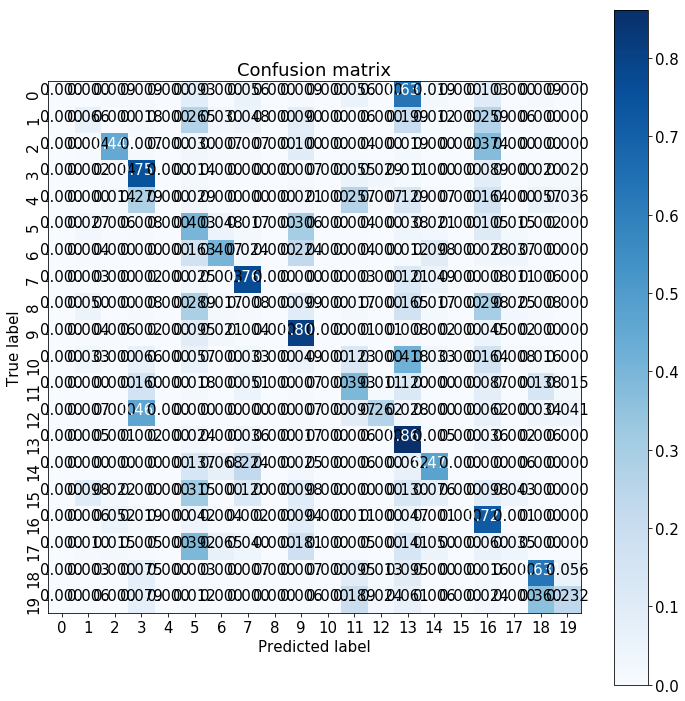

Food index: 0 correct: 0.0
Food index: 1 correct: 0.06626506024096386
Food index: 2 correct: 0.44814814814814813
Food index: 3 correct: 0.750445632798574
Food index: 4 correct: 0.0
Food index: 5 correct: 0.40344168260038243
Food index: 6 correct: 0.4065040650406504
Food index: 7 correct: 0.7692307692307693
Food index: 8 correct: 0.0
Food index: 9 correct: 0.8091553836234687
Food index: 10 correct: 0.0
Food index: 11 correct: 0.3927272727272727
Food index: 12 correct: 0.2620689655172414
Food index: 13 correct: 0.8618071374335611
Food index: 14 correct: 0.4720496894409938
Food index: 15 correct: 0.0
Food index: 16 correct: 0.721830985915493
Food index: 17 correct: 0.035175879396984924
Food index: 18 correct: 0.630718954248366
Food index: 19 correct: 0.23170731707317074
Wall time: 1.7 s
Accuracy: 36.31%


In [41]:
nhidden = np.array([2])
parameters = {'hidden_layer_sizes':nhidden,
             'solver': ['lbfgs'], 
             'activation':['relu'],
             'learning_rate':['adaptive']}
clf = MLPClassifier(max_iter=1000)


grid = GridSearchCV(clf, parameters)

%time grid.fit(X_train, y_train)

%time ann_model_2 = grid.best_estimator_
print(grid.best_estimator_)

%time y_ann_pred_2 = ann_model_2.predict(X_test)

%time accuracy_2, avg_accuracy_2 = all_result(y_test, y_ann_pred_2, FoodLabel)
#accuracy, avg_accuracy = all_result(y_test, y_ann_pred, faultlist, normalize=False)
print("Accuracy: {}%".format(round(avg_accuracy_2*100,2)))

## 10 layers

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 35min 57s
Wall time: 0 ns
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Wall time: 248 ms
Normalized confusion matrix


<Figure size 432x288 with 0 Axes>

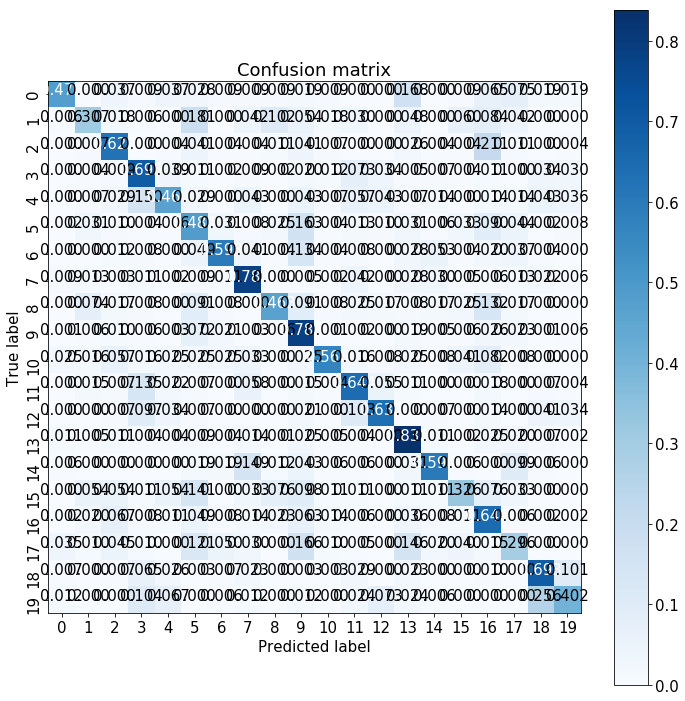

Food index: 0 correct: 0.4766355140186916
Food index: 1 correct: 0.3072289156626506
Food index: 2 correct: 0.6222222222222222
Food index: 3 correct: 0.6951871657754011
Food index: 4 correct: 0.4642857142857143
Food index: 5 correct: 0.4837476099426386
Food index: 6 correct: 0.5934959349593496
Food index: 7 correct: 0.783359497645212
Food index: 8 correct: 0.4628099173553719
Food index: 9 correct: 0.7833655705996132
Food index: 10 correct: 0.5655737704918032
Food index: 11 correct: 0.6436363636363637
Food index: 12 correct: 0.6344827586206897
Food index: 13 correct: 0.8382687927107062
Food index: 14 correct: 0.5962732919254659
Food index: 15 correct: 0.32608695652173914
Food index: 16 correct: 0.647887323943662
Food index: 17 correct: 0.2964824120603015
Food index: 18 correct: 0.6928104575163399
Food index: 19 correct: 0.4024390243902439
Wall time: 1.73 s
Accuracy: 56.58%


In [43]:
# for tuning; the final CPU was computed with only the finalized model and does not include tuning time
# nhidden = np.arange(10,100,5)
# parameters = {'hidden_layer_sizes':nhidden,
#              'solver': ['lbfgs', 'adam'], 
#              'activation':['relu'],
#              'learning_rate':['invscaling','adaptive']}

nhidden = np.array([10])
parameters = {'hidden_layer_sizes':nhidden,
             'solver': ['lbfgs'], 
             'activation':['relu'],
             'learning_rate':['adaptive']}
clf = MLPClassifier(max_iter=1000)


grid = GridSearchCV(clf, parameters)

%time grid.fit(X_train, y_train)

%time ann_model_10 = grid.best_estimator_
print(grid.best_estimator_)

%time y_ann_pred_10 = ann_model_10.predict(X_test)

%time accuracy_10, avg_accuracy_10 = all_result(y_test, y_ann_pred_10, FoodLabel)
#accuracy, avg_accuracy = all_result(y_test, y_ann_pred, faultlist, normalize=False)
print("Accuracy: {}%".format(round(avg_accuracy_10*100,2)))

## 30 layers

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 15min 42s
Wall time: 1 ms
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=30, learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Wall time: 285 ms
Normalized confusion matrix


<Figure size 432x288 with 0 Axes>

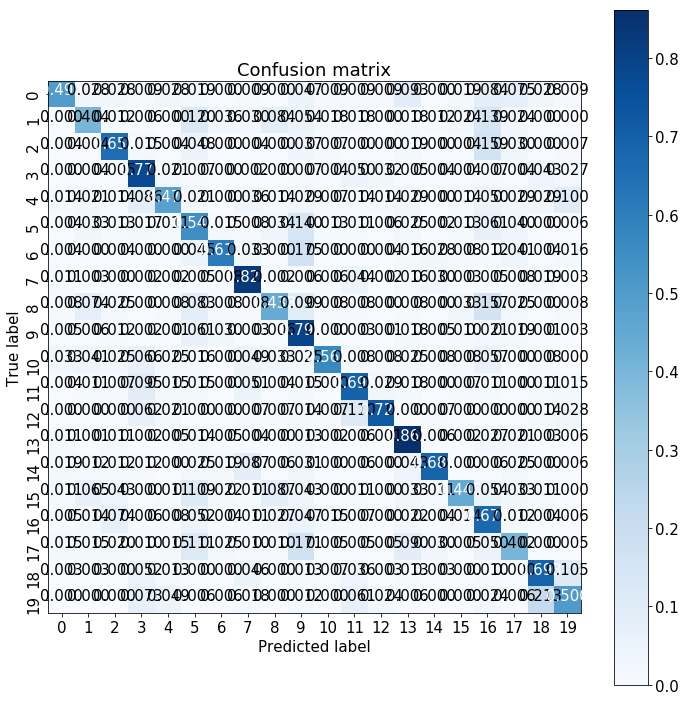

Food index: 0 correct: 0.4953271028037383
Food index: 1 correct: 0.4036144578313253
Food index: 2 correct: 0.6592592592592592
Food index: 3 correct: 0.7754010695187166
Food index: 4 correct: 0.4785714285714286
Food index: 5 correct: 0.5468451242829828
Food index: 6 correct: 0.6097560975609756
Food index: 7 correct: 0.8273155416012559
Food index: 8 correct: 0.4380165289256198
Food index: 9 correct: 0.7923920051579626
Food index: 10 correct: 0.5655737704918032
Food index: 11 correct: 0.6945454545454546
Food index: 12 correct: 0.7241379310344828
Food index: 13 correct: 0.8618071374335611
Food index: 14 correct: 0.6894409937888198
Food index: 15 correct: 0.44565217391304346
Food index: 16 correct: 0.67018779342723
Food index: 17 correct: 0.4020100502512563
Food index: 18 correct: 0.6928104575163399
Food index: 19 correct: 0.5
Wall time: 1.62 s
Accuracy: 61.36%


In [44]:
nhidden = np.array([30])
parameters = {'hidden_layer_sizes':nhidden,
             'solver': ['lbfgs'], 
             'activation':['relu'],
             'learning_rate':['adaptive']}
clf = MLPClassifier(max_iter=1000)


grid = GridSearchCV(clf, parameters)

%time grid.fit(X_train, y_train)

%time ann_model_30 = grid.best_estimator_
print(grid.best_estimator_)

%time y_ann_pred_30 = ann_model_30.predict(X_test)

%time accuracy_30, avg_accuracy_30 = all_result(y_test, y_ann_pred_30, FoodLabel)
#accuracy, avg_accuracy = all_result(y_test, y_ann_pred, faultlist, normalize=False)
print("Accuracy: {}%".format(round(avg_accuracy_30*100,2)))

## 50 layers

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 13min 18s
Wall time: 1 ms
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Wall time: 286 ms
Normalized confusion matrix


<Figure size 432x288 with 0 Axes>

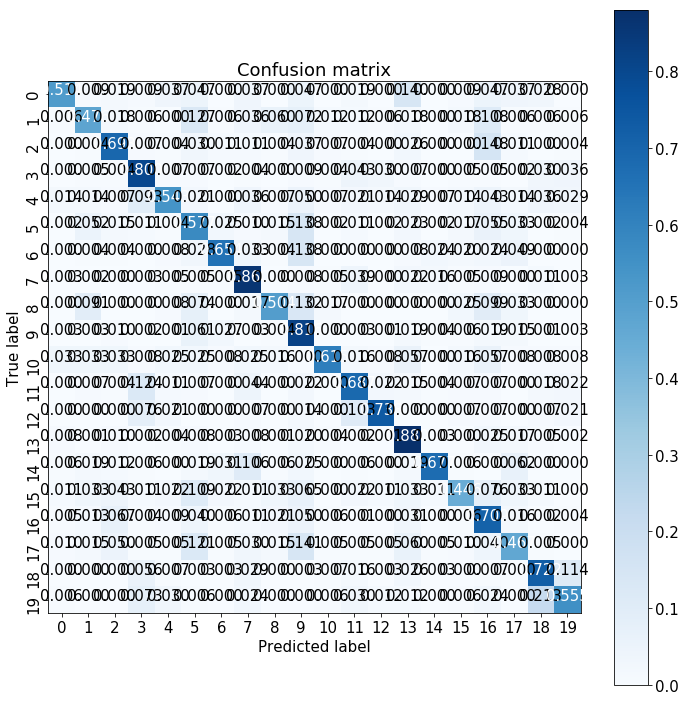

Food index: 0 correct: 0.514018691588785
Food index: 1 correct: 0.4759036144578313
Food index: 2 correct: 0.6925925925925925
Food index: 3 correct: 0.8003565062388592
Food index: 4 correct: 0.5428571428571428
Food index: 5 correct: 0.5774378585086042
Food index: 6 correct: 0.6544715447154471
Food index: 7 correct: 0.8602825745682888
Food index: 8 correct: 0.5041322314049587
Food index: 9 correct: 0.816247582205029
Food index: 10 correct: 0.6147540983606558
Food index: 11 correct: 0.6872727272727273
Food index: 12 correct: 0.7379310344827587
Food index: 13 correct: 0.880030372057707
Food index: 14 correct: 0.6770186335403726
Food index: 15 correct: 0.44565217391304346
Food index: 16 correct: 0.7089201877934272
Food index: 17 correct: 0.46733668341708545
Food index: 18 correct: 0.7222222222222222
Food index: 19 correct: 0.5548780487804879
Wall time: 1.73 s
Accuracy: 64.67%


In [45]:
nhidden = np.array([50])
parameters = {'hidden_layer_sizes':nhidden,
             'solver': ['lbfgs'], 
             'activation':['relu'],
             'learning_rate':['adaptive']}
clf = MLPClassifier(max_iter=1000)


grid = GridSearchCV(clf, parameters)

%time grid.fit(X_train, y_train)

%time ann_model_50 = grid.best_estimator_
print(grid.best_estimator_)

%time y_ann_pred_50 = ann_model_50.predict(X_test)

%time accuracy_50, avg_accuracy_50 = all_result(y_test, y_ann_pred_50, FoodLabel)
#accuracy, avg_accuracy = all_result(y_test, y_ann_pred, faultlist, normalize=False)
print("Accuracy: {}%".format(round(avg_accuracy_50*100,2)))

## 75 layers

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 16min 16s
Wall time: 0 ns
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=75, learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Wall time: 449 ms
Normalized confusion matrix


<Figure size 432x288 with 0 Axes>

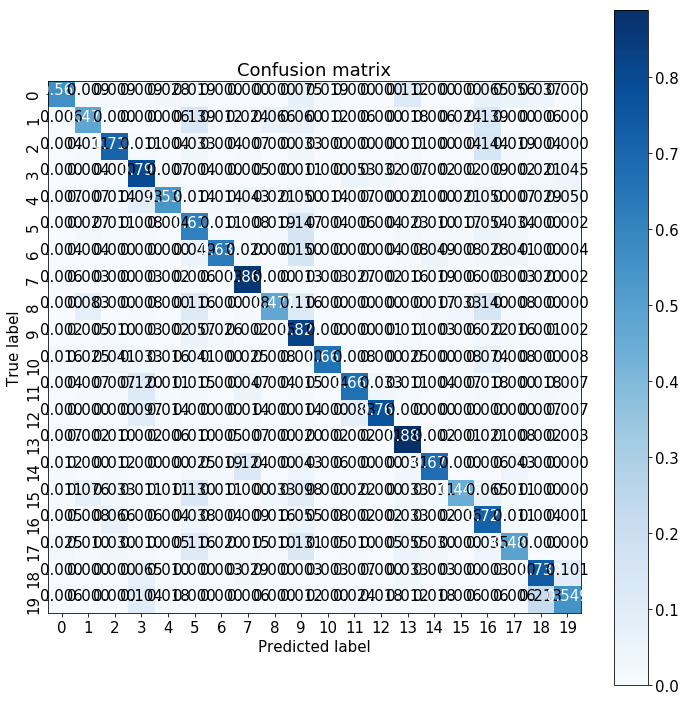

Food index: 0 correct: 0.5607476635514018
Food index: 1 correct: 0.4759036144578313
Food index: 2 correct: 0.7111111111111111
Food index: 3 correct: 0.7967914438502673
Food index: 4 correct: 0.5357142857142857
Food index: 5 correct: 0.6118546845124283
Food index: 6 correct: 0.6300813008130082
Food index: 7 correct: 0.8634222919937206
Food index: 8 correct: 0.47107438016528924
Food index: 9 correct: 0.8265635074145713
Food index: 10 correct: 0.6639344262295082
Food index: 11 correct: 0.6690909090909091
Food index: 12 correct: 0.7655172413793103
Food index: 13 correct: 0.8883826879271071
Food index: 14 correct: 0.6770186335403726
Food index: 15 correct: 0.44565217391304346
Food index: 16 correct: 0.7206572769953051
Food index: 17 correct: 0.48743718592964824
Food index: 18 correct: 0.738562091503268
Food index: 19 correct: 0.5487804878048781
Wall time: 1.68 s
Accuracy: 65.44%


In [46]:
nhidden = np.array([75])
parameters = {'hidden_layer_sizes':nhidden,
             'solver': ['lbfgs'], 
             'activation':['relu'],
             'learning_rate':['adaptive']}
clf = MLPClassifier(max_iter=1000)


grid = GridSearchCV(clf, parameters)

%time grid.fit(X_train, y_train)

%time ann_model_75 = grid.best_estimator_
print(grid.best_estimator_)

%time y_ann_pred_75 = ann_model_75.predict(X_test)

%time accuracy_75, avg_accuracy_75 = all_result(y_test, y_ann_pred_75, FoodLabel)
#accuracy, avg_accuracy = all_result(y_test, y_ann_pred, faultlist, normalize=False)
print("Accuracy: {}%".format(round(avg_accuracy_75*100,2)))

## 100 layers

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 16min 6s
Wall time: 1e+03 µs
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Wall time: 434 ms
Normalized confusion matrix


<Figure size 432x288 with 0 Axes>

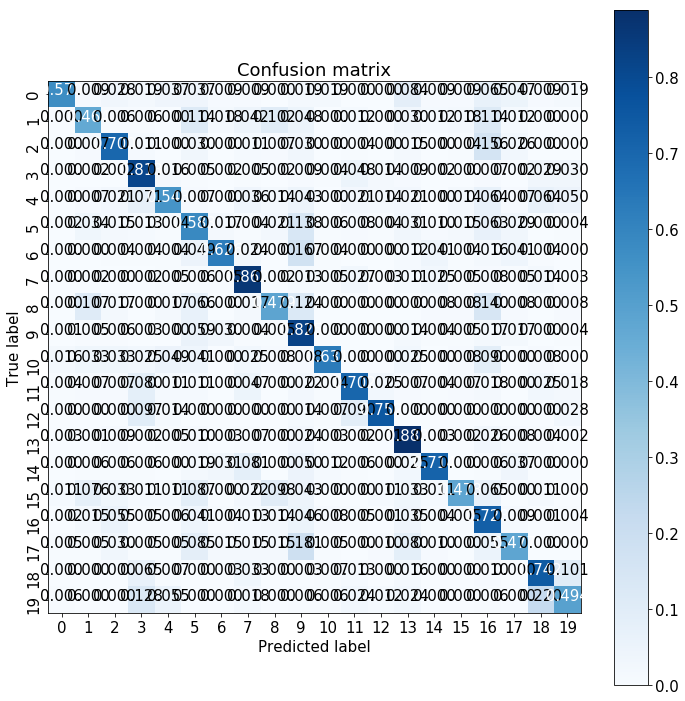

Food index: 0 correct: 0.5700934579439252
Food index: 1 correct: 0.463855421686747
Food index: 2 correct: 0.7
Food index: 3 correct: 0.8128342245989305
Food index: 4 correct: 0.5428571428571428
Food index: 5 correct: 0.5831739961759083
Food index: 6 correct: 0.6260162601626016
Food index: 7 correct: 0.8618524332810047
Food index: 8 correct: 0.4793388429752066
Food index: 9 correct: 0.8252740167633784
Food index: 10 correct: 0.6311475409836066
Food index: 11 correct: 0.7018181818181818
Food index: 12 correct: 0.7517241379310344
Food index: 13 correct: 0.8883826879271071
Food index: 14 correct: 0.7142857142857143
Food index: 15 correct: 0.4782608695652174
Food index: 16 correct: 0.7276995305164319
Food index: 17 correct: 0.47738693467336685
Food index: 18 correct: 0.7418300653594772
Food index: 19 correct: 0.49390243902439024
Wall time: 1.59 s
Accuracy: 65.36%


In [12]:
nhidden = np.array([100])
parameters = {'hidden_layer_sizes':nhidden,
             'solver': ['lbfgs'], 
             'activation':['relu'],
             'learning_rate':['adaptive']}
clf = MLPClassifier(max_iter=1000)


grid = GridSearchCV(clf, parameters)

%time grid.fit(X_train, y_train)

%time ann_model_100 = grid.best_estimator_
print(grid.best_estimator_)

%time y_ann_pred_100 = ann_model_100.predict(X_test)

%time accuracy_100, avg_accuracy_100 = all_result(y_test, y_ann_pred_100, FoodLabel)
#accuracy, avg_accuracy = all_result(y_test, y_ann_pred, faultlist, normalize=False)
print("Accuracy: {}%".format(round(avg_accuracy_100*100,2)))

## 500

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 50min 53s
Wall time: 2 ms
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=500, learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Wall time: 1.47 s
Normalized confusion matrix


<Figure size 432x288 with 0 Axes>

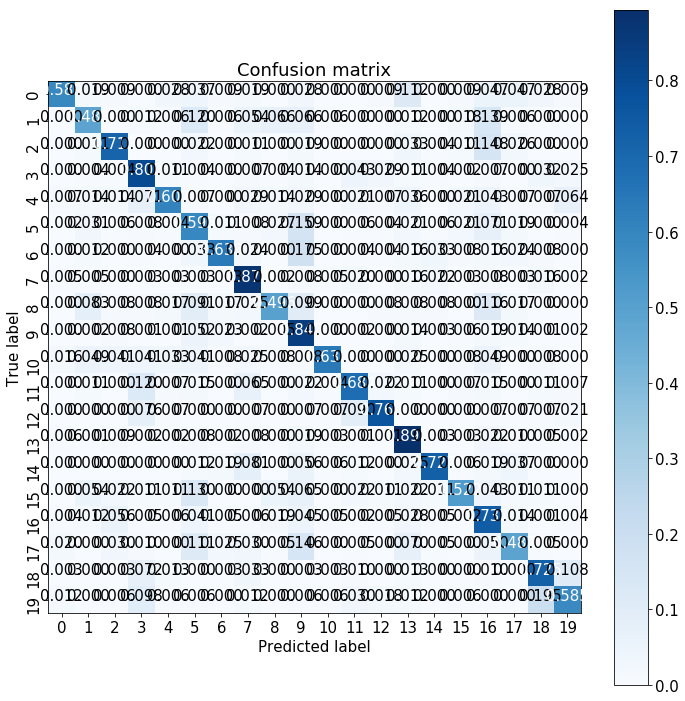

Food index: 0 correct: 0.5887850467289719
Food index: 1 correct: 0.4879518072289157
Food index: 2 correct: 0.7148148148148148
Food index: 3 correct: 0.8021390374331551
Food index: 4 correct: 0.6071428571428571
Food index: 5 correct: 0.5946462715105163
Food index: 6 correct: 0.6382113821138211
Food index: 7 correct: 0.8744113029827315
Food index: 8 correct: 0.49586776859504134
Food index: 9 correct: 0.8446163765312702
Food index: 10 correct: 0.639344262295082
Food index: 11 correct: 0.6836363636363636
Food index: 12 correct: 0.7655172413793103
Food index: 13 correct: 0.8936977980258163
Food index: 14 correct: 0.7267080745341615
Food index: 15 correct: 0.5217391304347826
Food index: 16 correct: 0.7370892018779343
Food index: 17 correct: 0.48743718592964824
Food index: 18 correct: 0.7254901960784313
Food index: 19 correct: 0.5853658536585366
Wall time: 1.87 s
Accuracy: 67.07%


In [14]:
nhidden = np.array([500])
parameters = {'hidden_layer_sizes':nhidden,
             'solver': ['lbfgs'], 
             'activation':['relu'],
             'learning_rate':['adaptive']}
clf = MLPClassifier(max_iter=1000)


grid = GridSearchCV(clf, parameters)

%time grid.fit(X_train, y_train)

%time ann_model_500 = grid.best_estimator_
print(grid.best_estimator_)

%time y_ann_pred_500 = ann_model_500.predict(X_test)

%time accuracy_500, avg_accuracy_500 = all_result(y_test, y_ann_pred_500, FoodLabel)
#accuracy, avg_accuracy = all_result(y_test, y_ann_pred, faultlist, normalize=False)
print("Accuracy: {}%".format(round(avg_accuracy_500*100,2)))

## 1000 layers

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 1h 35min 13s
Wall time: 0 ns
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=1000, learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Wall time: 2.98 s
Normalized confusion matrix


<Figure size 432x288 with 0 Axes>

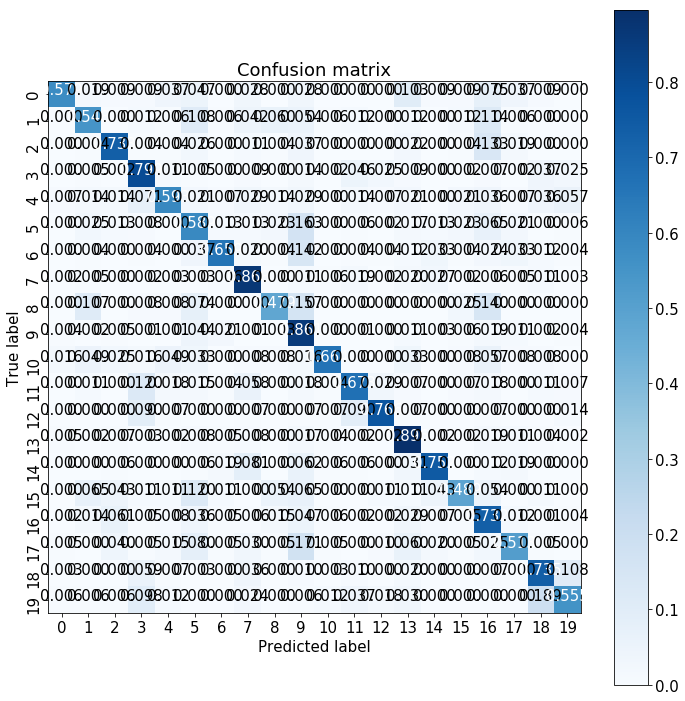

Food index: 0 correct: 0.5794392523364486
Food index: 1 correct: 0.5481927710843374
Food index: 2 correct: 0.7333333333333333
Food index: 3 correct: 0.7985739750445633
Food index: 4 correct: 0.5928571428571429
Food index: 5 correct: 0.5889101338432122
Food index: 6 correct: 0.6585365853658537
Food index: 7 correct: 0.8681318681318682
Food index: 8 correct: 0.4793388429752066
Food index: 9 correct: 0.8607350096711799
Food index: 10 correct: 0.6639344262295082
Food index: 11 correct: 0.6727272727272727
Food index: 12 correct: 0.7655172413793103
Food index: 13 correct: 0.8959757023538345
Food index: 14 correct: 0.7515527950310559
Food index: 15 correct: 0.4891304347826087
Food index: 16 correct: 0.7323943661971831
Food index: 17 correct: 0.5125628140703518
Food index: 18 correct: 0.7352941176470589
Food index: 19 correct: 0.5548780487804879
Wall time: 1.58 s
Accuracy: 67.41%


In [15]:
nhidden = np.array([1000])
parameters = {'hidden_layer_sizes':nhidden,
             'solver': ['lbfgs'], 
             'activation':['relu'],
             'learning_rate':['adaptive']}
clf = MLPClassifier(max_iter=1000)


grid = GridSearchCV(clf, parameters)

%time grid.fit(X_train, y_train)

%time ann_model_1000 = grid.best_estimator_
print(grid.best_estimator_)

%time y_ann_pred_1000 = ann_model_1000.predict(X_test)

%time accuracy_1000, avg_accuracy_1000 = all_result(y_test, y_ann_pred_1000, FoodLabel)
#accuracy, avg_accuracy = all_result(y_test, y_ann_pred, faultlist, normalize=False)
print("Accuracy: {}%".format(round(avg_accuracy_1000*100,2)))